In [1]:
from IPython.core.display import display, HTML
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

### Pie chart in Matplotlibs

In [2]:
df_iris = sns.load_dataset('iris') 

(-1.190932678896056,
 1.104330153390863,
 -1.1025000171202477,
 1.1524999979837747)

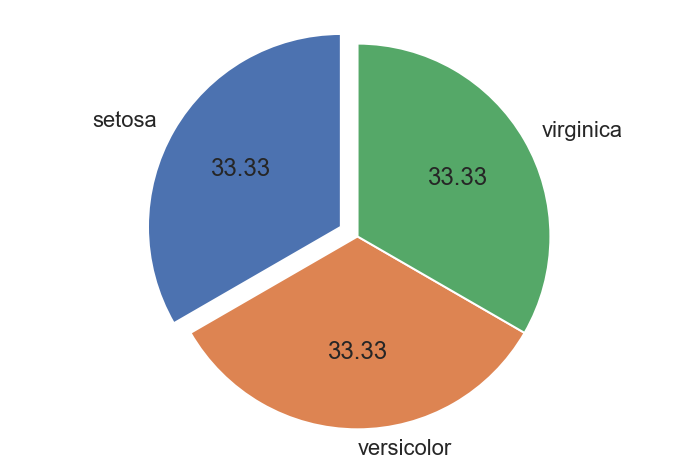

In [6]:
pie_plt=df_iris[['sepal_length','species']].groupby('species').count()
mypie=plt.pie(pie_plt['sepal_length'],labels=pie_plt.index,autopct='%.2f',startangle=90,explode=[0.1,0,0])
plt.axis('equal')

### God bless <a href="https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct" target="_top">Stack Overflow</a> !

`autopct` enables you to display the percent value using Python string formatting. For example, if autopct= `%.2f`, then for each pie wedge, the format string is `%.2f` and the numerical percent value for that wedge is pct, so the wedge label is set to the string `'%.2f'%pct`. 

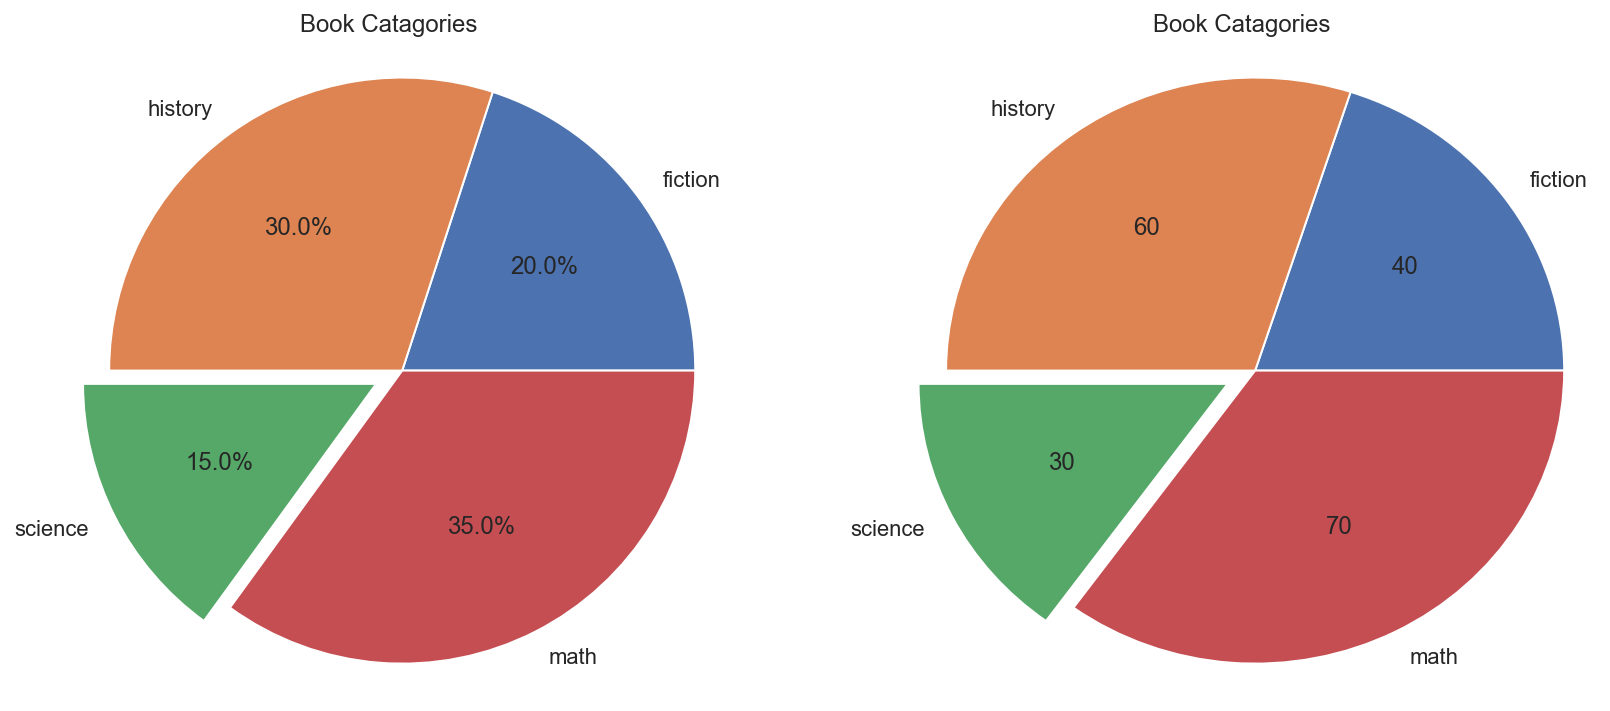

In [7]:
labels=['fiction','history','science','math']
sizes=[40,60,30,70] # totals 200
explode=(0,0,0.1,0) # tuple

fig,ax=plt.subplots(1,2,figsize=(14,6),num=9)

ax[0].pie(sizes,labels=labels,explode=explode,autopct='%.1f%%')
ax[0].set_title('Book Catagories')
ax[0].axis('equal')

ax[1].pie(sizes,labels=labels,explode=explode, autopct=lambda p: '{:.0f}'.format(p * sum(sizes) / 100.0))
ax[1].set_title('Book Catagories')
ax[1].axis('auto')

plt.show()

Hypertext Transfer Protocol (HTTP) is a messaging protocol that describes the types and structure of messages that can be used for communication between servers and clients. Communication occurs in a request-response cycle, in which a client sends a request to the server which then replies with a response.
- If the page is very simple, treat it as a bunch of text => __string manipulation / [regular expressions](https://docs.python.org/2/howto/regex.html)__ in Python.
- If the page is more complicated (and/or written in good style), we want to use the HTML parse tree => __[BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) / [lxml](http://lxml.de/lxmlhtml.html)__ in Python.

In [8]:
import requests
from bs4 import BeautifulSoup

URL = "https://en.wikipedia.org/wiki/Fastest_animals"
animal_dict={}
res = requests.get(URL).text
soup = BeautifulSoup(res,'lxml')
for items in soup.find('table', class_='wikitable').find_all('tr')[1::1]: #tr defines the row
    data = items.find_all(['th','td'])
    try:
        animal = data[1].a.text
        speed = data[2].text.split('km/h')[0].strip()
    except IndexError:pass
    animal_dict[animal]=speed

In [11]:
data[2].text.split('km/h')[0].strip()

'80'

In [12]:
import re

def mean_str(x):
    x=re.sub('[^0-9]',' ',x)
    x=x.split(' ')
    x=[float(item) for item in x]
    return sum(x)/len(x)

df=pd.Series(animal_dict).reset_index()
df.columns=['Animal','Speed (km/h)']

In [13]:
df['Speed']=df['Speed (km/h)'].apply(lambda x:mean_str(x))
df

,Animal,Speed (km/h),Speed
0,Peregrine falcon,389,389.0
1,Golden eagle,240–320,280.0
2,White-throated needletail swift,169,169.0
3,Eurasian hobby,160,160.0
4,Mexican free-tailed bat,160,160.0
5,Frigatebird,153,153.0
6,Rock dove,148.9,78.5
7,Spur-winged goose,142,142.0
8,Gyrfalcon,128,128.0
9,Grey-headed albatross,127,127.0


### Vertical and Horizontal bars

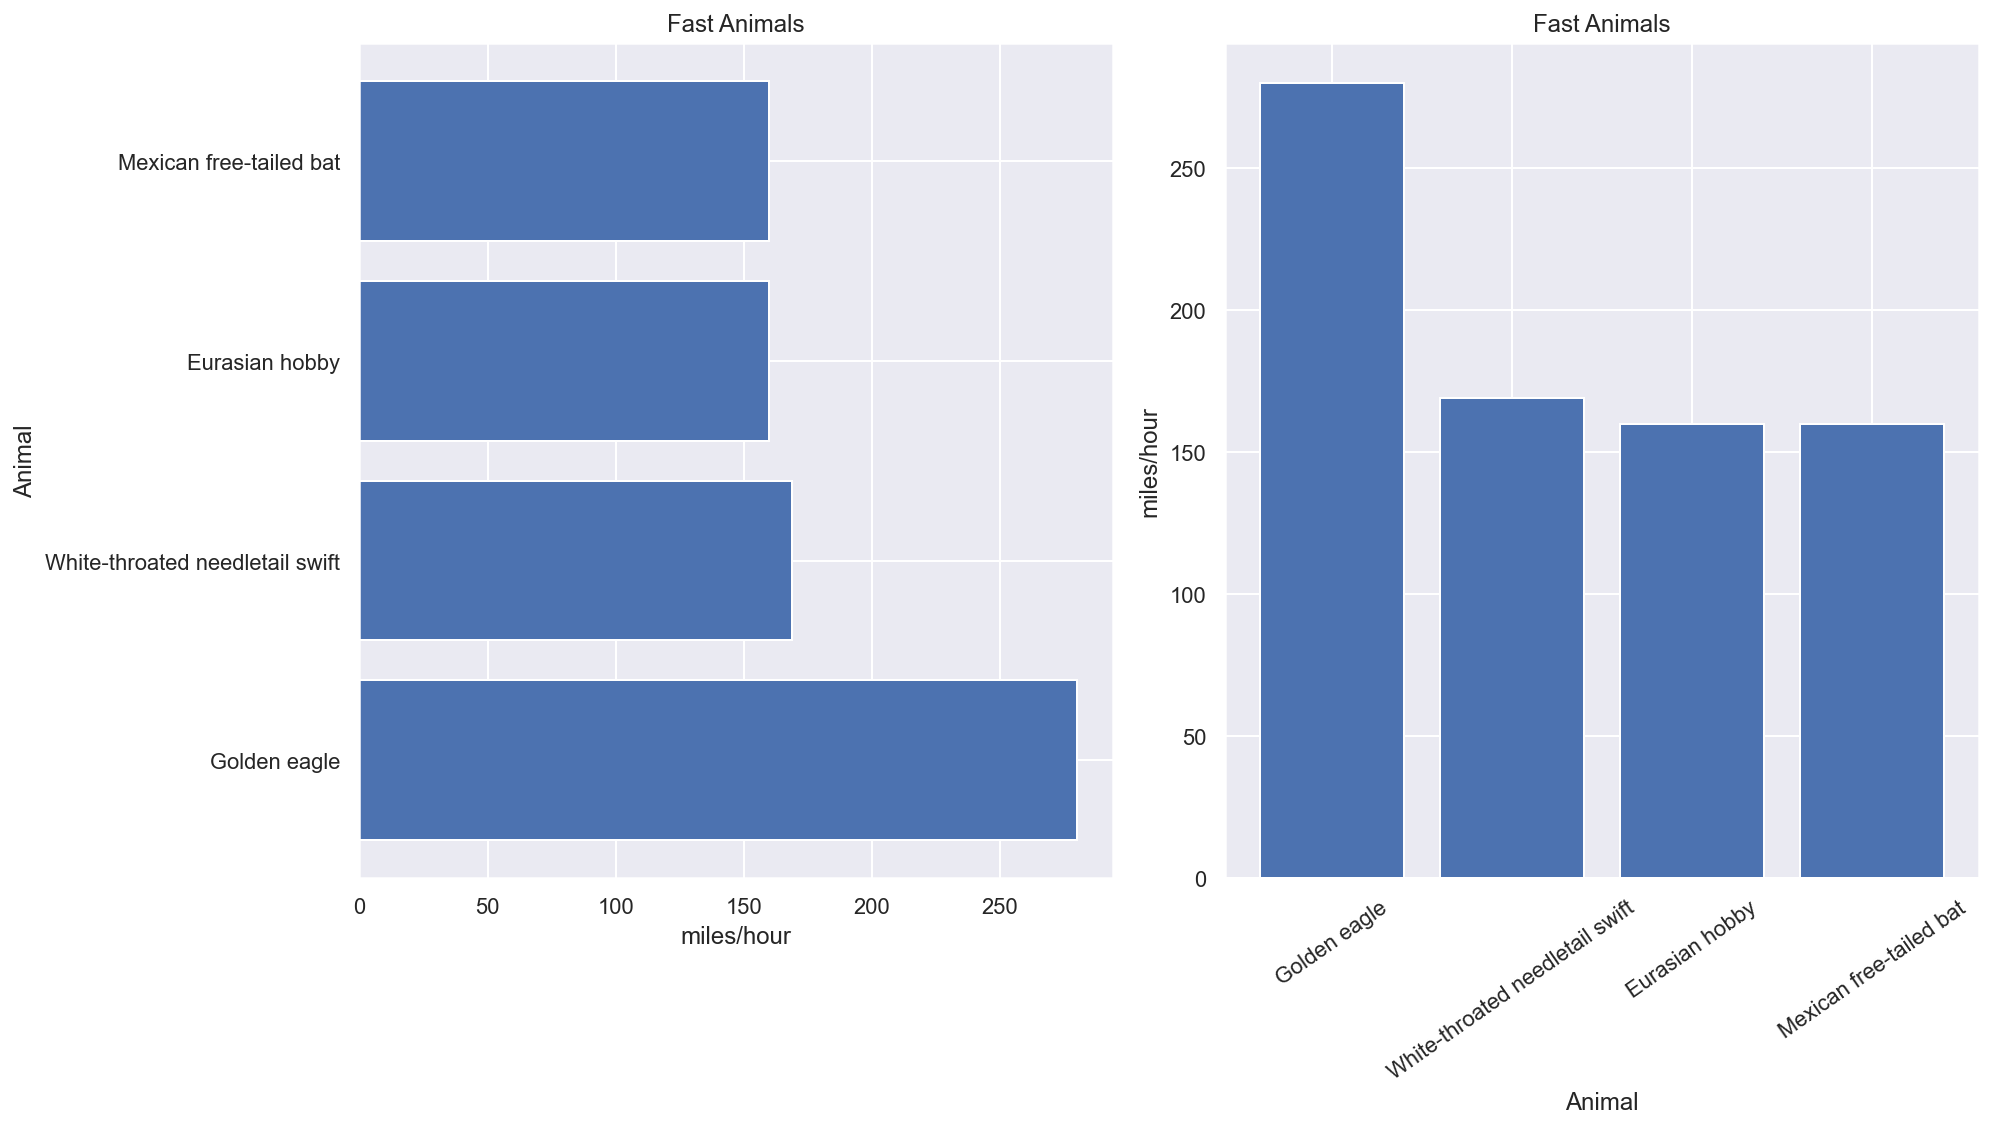

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df=df.iloc[1:5,:]
fig,ax=plt.subplots(1,2,figsize=(14,8),num=91)

ax[0].barh(df['Animal'], df['Speed'])
ax[0].set_title('Fast Animals')
ax[0].set_xlabel('miles/hour')
ax[0].set_ylabel('Animal')
plt.xticks(range(len(df)), df['Animal'],rotation=35)

ax[1].bar( range(len(df)), df['Speed'])
ax[1].set_title('Fast Animals')
ax[1].set_ylabel('miles/hour')
ax[1].set_xlabel('Animal')
plt.tight_layout()
plt.show()

### Stacked Bar Charts

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
usa=np.array([100,150,200,200,150,85])
uk=usa*0.50
can=usa*0.25
mo=[1,2,3,4,5,6]

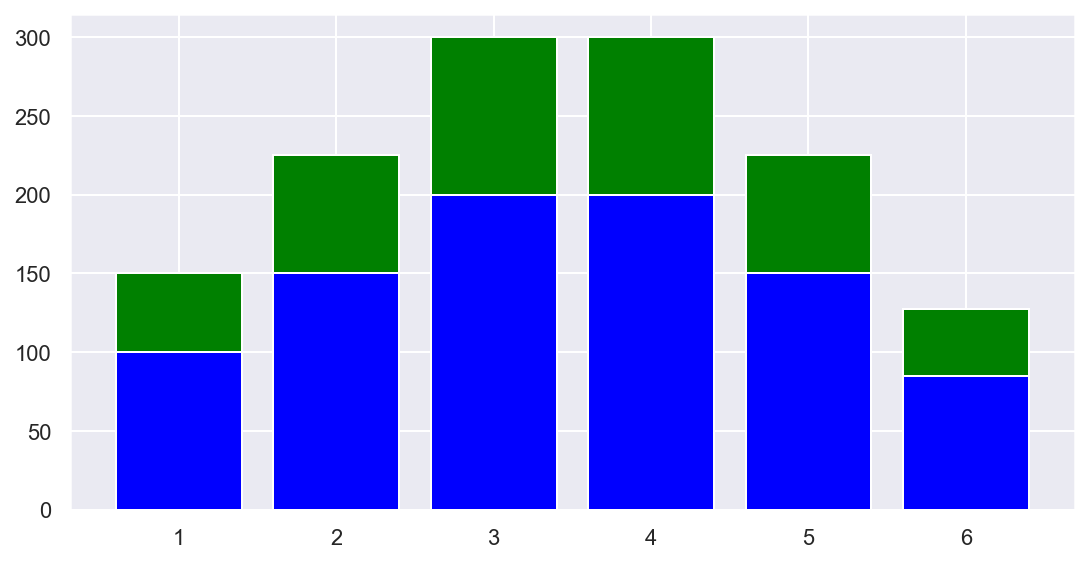

In [18]:
fig,ax=plt.subplots(figsize=(9,6),num=93) # a circle will be stretched such that the height is num times the width
ax.bar(mo,usa,color='blue')
ax.bar(mo,uk,color='green',bottom=usa)
ax.set_aspect(aspect=0.01)

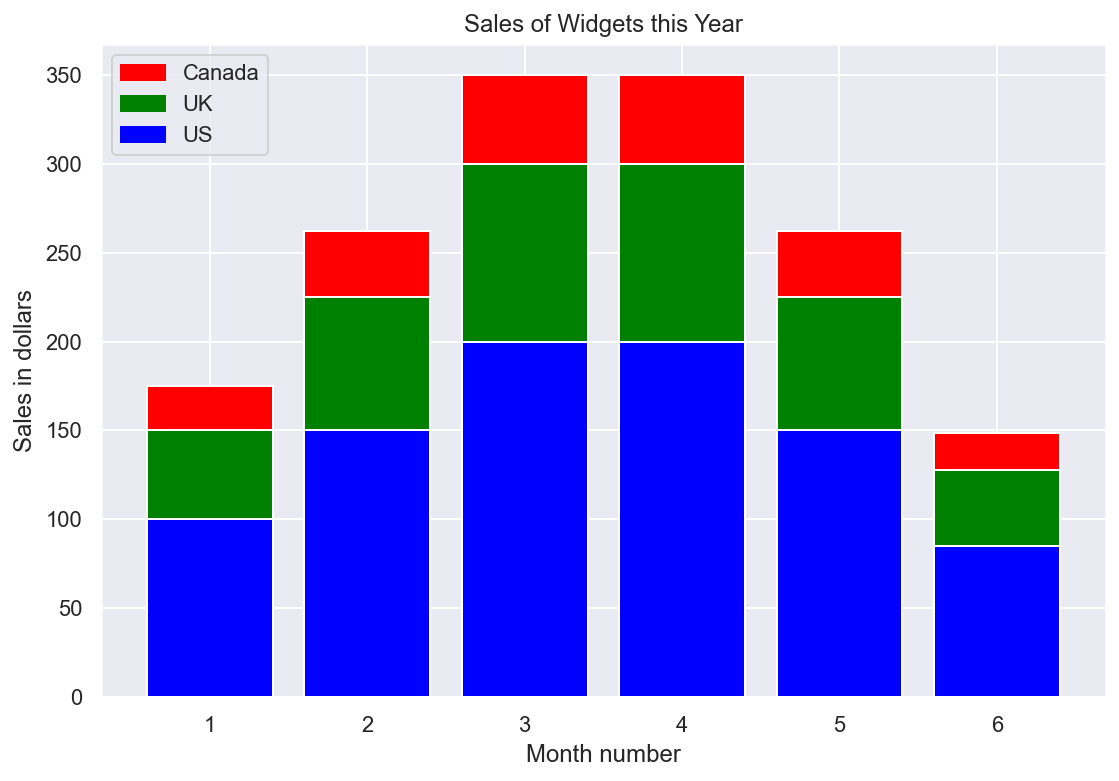

In [20]:
fig,ax=plt.subplots(figsize=(9,6),num=93)

# bottom: The y coordinate(s) of the bars bases

ax.bar(mo,usa,color='blue')
ax.bar(mo,uk,color='green',bottom=usa)
ax.bar(mo,can,color='red', bottom=list(map(lambda x,y: x+y, usa,uk)))

ax.set_xlabel('Month number')
ax.set_ylabel('Sales in dollars')
ax.set_title('Sales of Widgets this Year')

blue_patch=mpatches.Patch(color='blue',label='US')
green_patch=mpatches.Patch(color='green',label='UK')
red_patch=mpatches.Patch(color='red',label='Canada')

ax.legend(handles=[red_patch,green_patch,blue_patch], loc='upper left')

plt.show()

### Ticks and Canvas

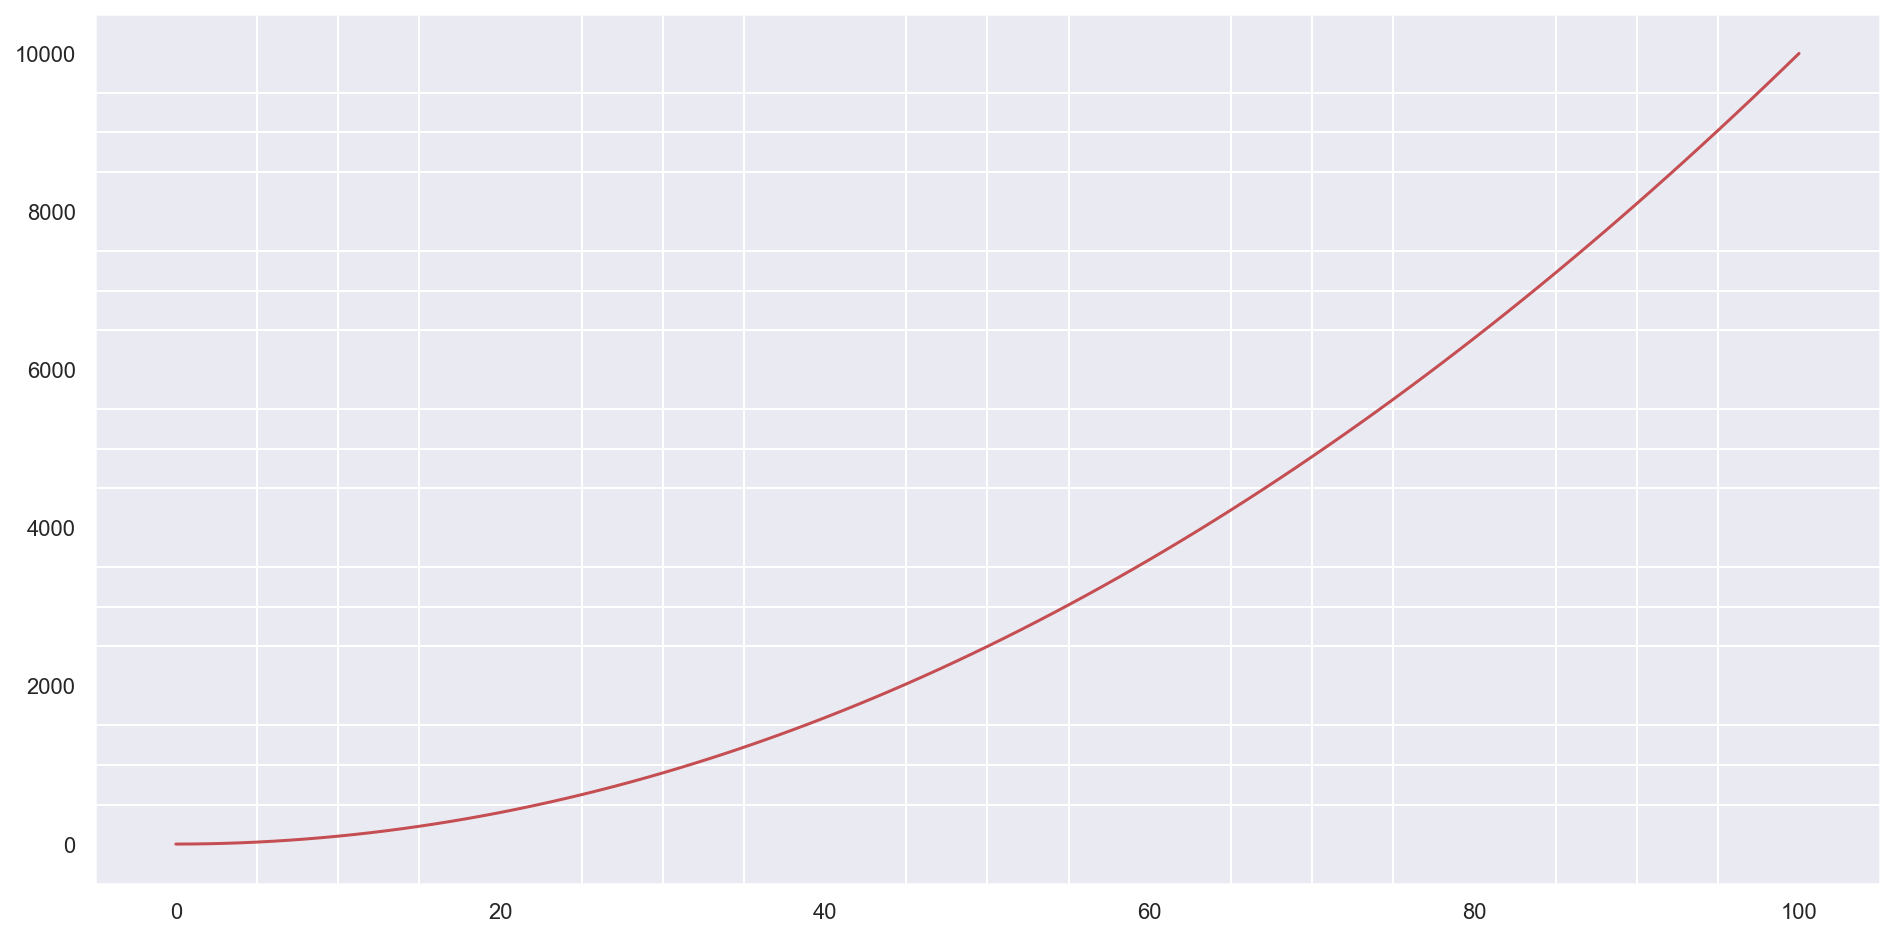

In [22]:
import numpy as np
import matplotlib.pyplot as plt

xt=np.arange(0,101)
yt=xt*xt

fig3=plt.figure(num=94,figsize=(16,8))

ax3=plt.gca() #current graphical axes
ax3.plot(xt,yt,color='r')

maj_ticks_x=np.arange(0, 101, 20)
min_ticks_x=np.arange(0, 101, 5)
maj_ticks_y=np.arange(0, 10001, 2000)
min_ticks_y=np.arange(0, 10001, 500)

ax3.set_xticks(maj_ticks_x)
ax3.set_xticks(min_ticks_x, minor=True)
ax3.set_yticks(maj_ticks_y)
ax3.set_yticks(min_ticks_y, minor=True)
ax3.grid(which='minor')
ax3.grid(which='major')

plt.show()

In [23]:
from datetime import datetime, date, time, timedelta

NPTS=330
d2=datetime(2019,1,26)
d1=datetime(2018,3,2) # 330 days prior
dates=pd.date_range(d1,(d2-timedelta(days=1)))

price=np.zeros(NPTS)
base_price=477
for i in range(NPTS):
    price[i] = base_price + 100*np.sin(4*np.pi*i/NPTS)


In [24]:
np.random.seed(51)
ask_n=20*np.random.randn(NPTS)
bid_n=35*np.random.randn(NPTS)
ask=price+25+ask_n
bid=price-75+bid_n

match=np.zeros(NPTS)
for i in np.arange(NPTS):
    if bid[i] >= ask[i]:
        match[i]=1
        
vol=20+5*np.random.randn(NPTS)

### Illustration of Canvas

<ipython-input-25-701f66be59ef>:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


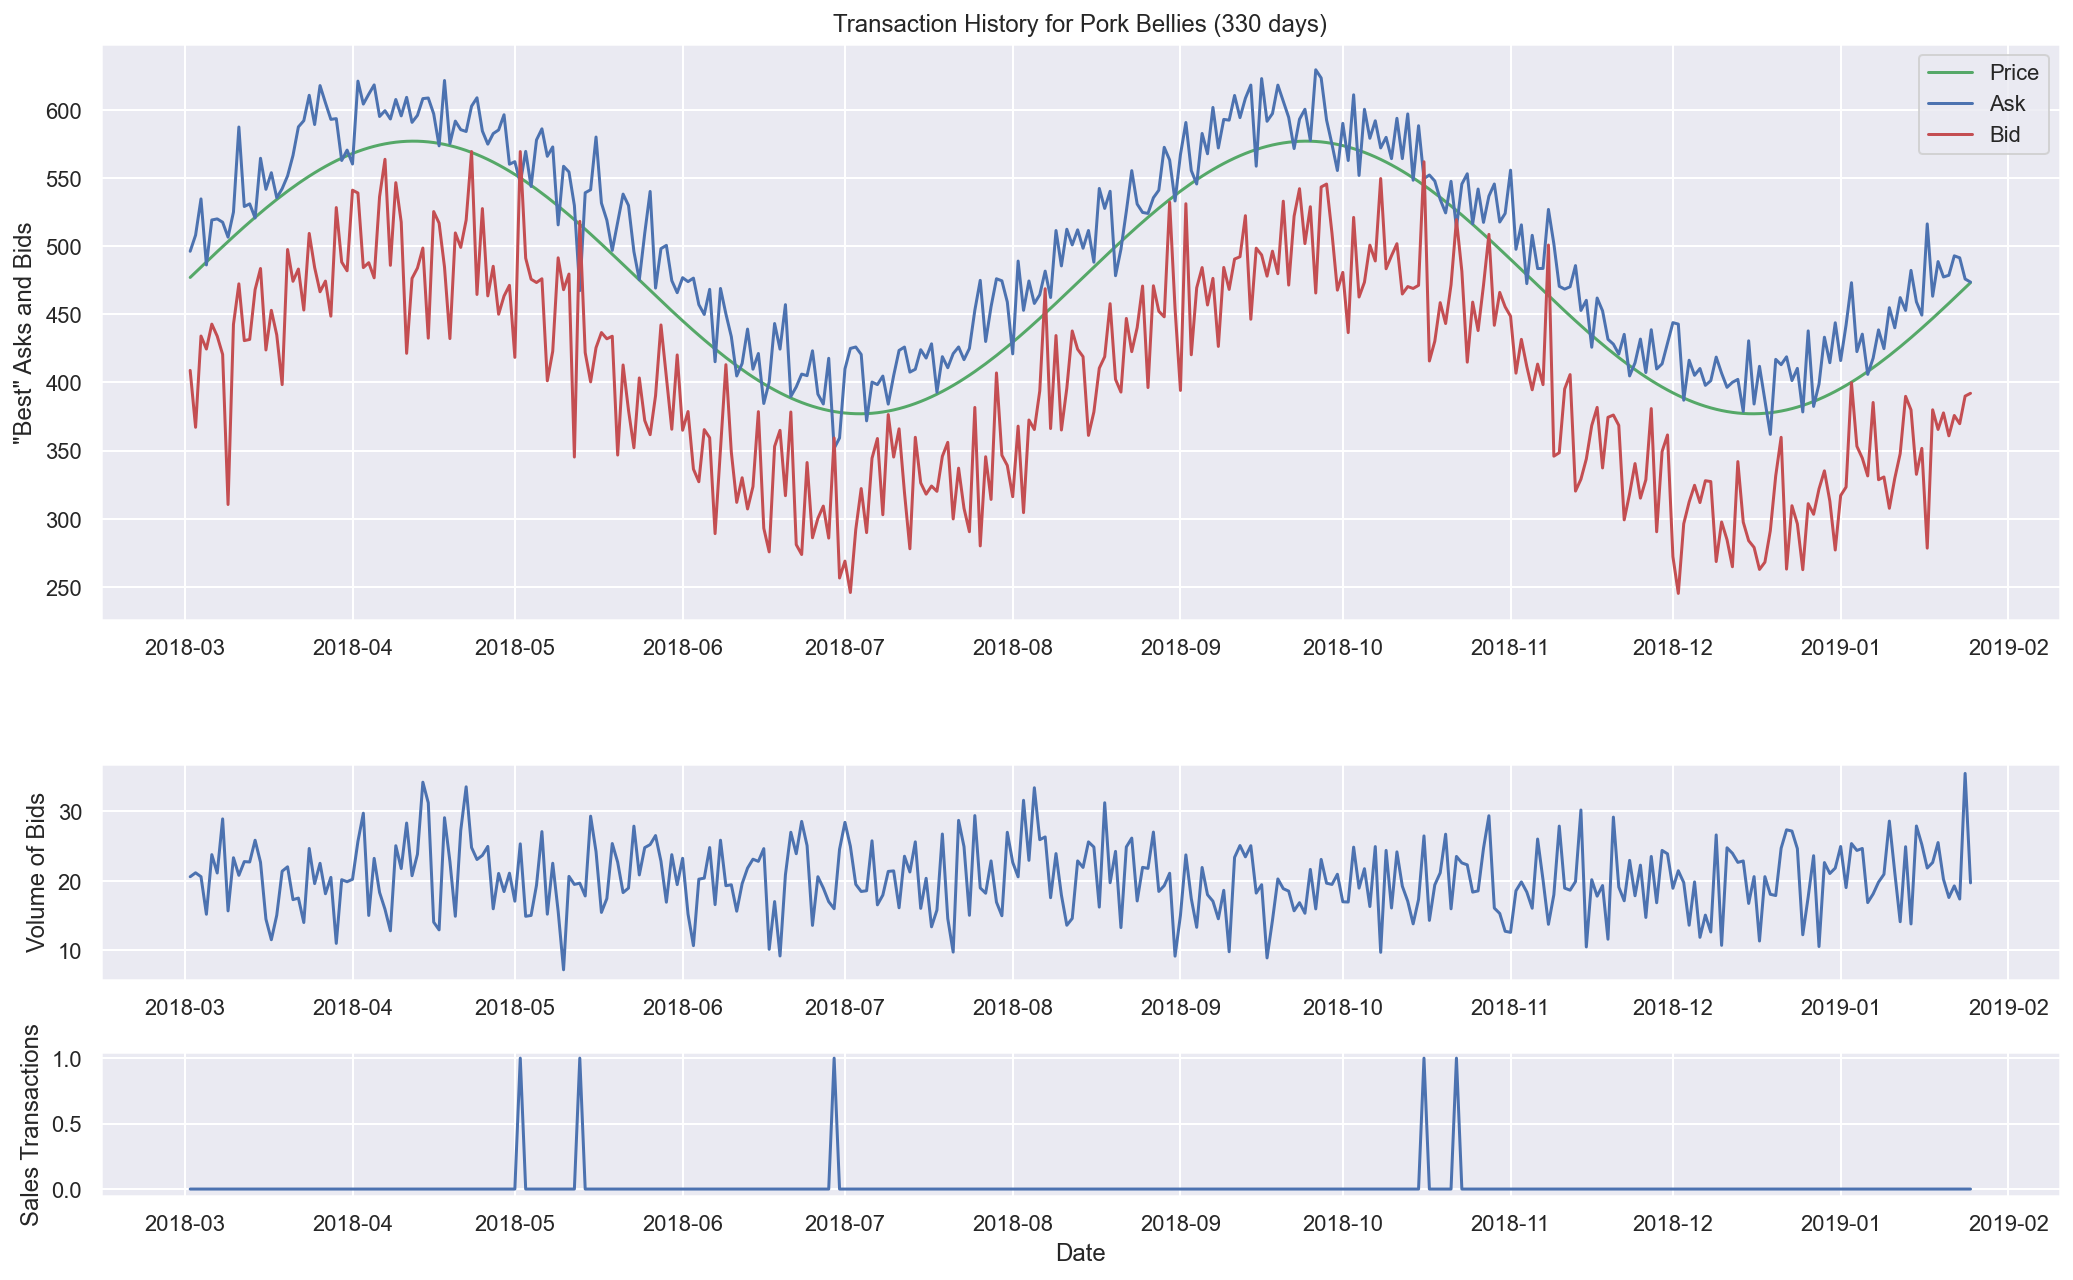

In [25]:
fig=plt.figure(figsize=(16,10),num=95)

ax1=fig.add_axes([0.1,0.50,0.85,0.40]) #left, bottom, lenght, height
ax2=fig.add_axes([0.1,0.25,0.85,0.15])
ax3=fig.add_axes([0.1,0.10,0.85,0.10])

ax1.plot(dates,price,'g',label='Price')
ax1.plot(dates,ask,'b',label='Ask')
ax1.plot(dates,bid,'r',label='Bid')
ax1.legend(loc=0)

ax2.plot(dates,vol)

ax3.plot(dates,match)
ax3.set_xlabel('Date')

ax1.set_title('Transaction History for Pork Bellies (330 days)')
ax1.set_ylabel('"Best" Asks and Bids')

ax2.set_ylabel('Volume of Bids')

ax3.set_ylabel('Sales Transactions')

plt.tight_layout()
plt.show()

         date  units
0  2010-01-05     15
1  2010-01-10     20
2  2010-01-15     25
3  2010-01-20     35
4  2010-01-25     50
5  2010-01-30     55
            units
date             
2010-01-05     15
2010-01-10     20
2010-01-15     25
2010-01-20     35
2010-01-25     50
2010-01-30     55


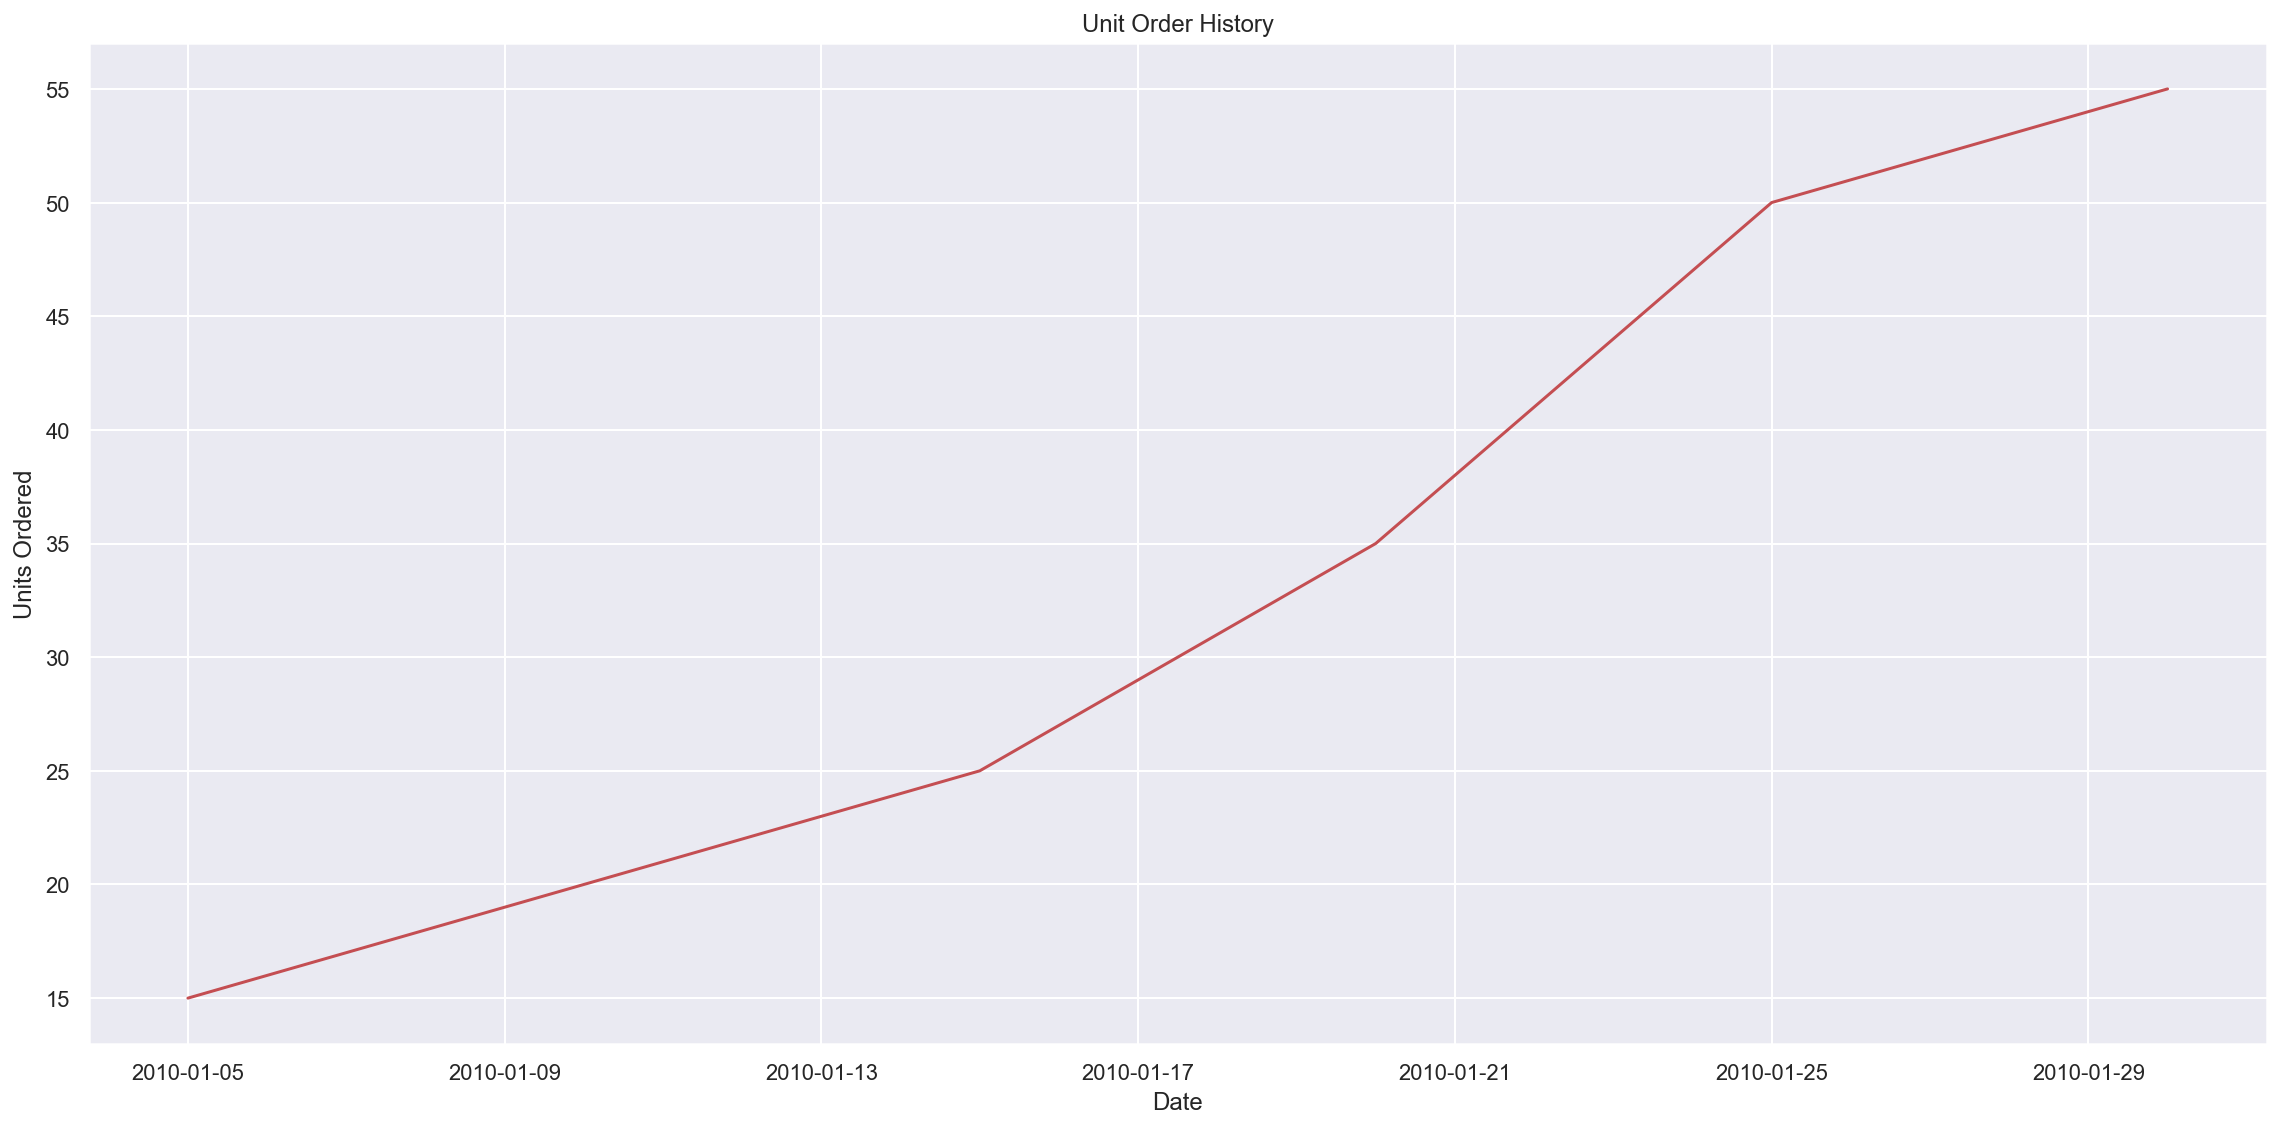

In [26]:
dlist=['2010-01-05','2010-01-10','2010-01-15','2010-01-20','2010-01-25','2010-01-30']
ulist=[15,20,25,35,50,55]

d2={'date':dlist, 'units':ulist}
df2=pd.DataFrame(d2)
print(df2)

df2['date']=pd.to_datetime(df2['date'])
df2=df2.set_index('date')
print(df2)

fig2=plt.figure(num=53,figsize=(16,8))

ax=plt.gca() #Get the current Axes

ax.plot(df2['units'],color='r')
ax.set_title('Unit Order History')
ax.set_xlabel('Date')
ax.set_ylabel('Units Ordered')
plt.tight_layout()
plt.show()

### Time series data; more examples

In [27]:
weather=pd.read_csv('temperatures.csv',names=['Date', 'Temp'])

rain=np.random.randn(1,len(weather))
rain=np.round(rain[0]*30,1) 
rain[rain<5]=0
weather['Rain']=rain #made up rainfall data

In [28]:
print(weather.dtypes)
weather['Date']

Date     object
Temp      int64
Rain    float64
dtype: object


0            2001-1-1 0:00:00
1            2001-1-1 1:00:00
2            2001-1-1 2:00:00
3            2001-1-1 3:00:00
4            2001-1-1 4:00:00
                 ...         
112990    2013-12-31 14:00:00
112991    2013-12-31 15:00:00
112992    2013-12-31 16:00:00
112993    2013-12-31 17:00:00
112994    2013-12-31 18:00:00
Name: Date, Length: 112995, dtype: object

In [35]:
weather['Date']=pd.to_datetime(weather['Date'])
weather['Year']=pd.DatetimeIndex(weather['Date']).year
weather['Month']=pd.DatetimeIndex(weather['Date']).month
weather['Day']=pd.DatetimeIndex(weather['Date']).day
weather['hour']=pd.DatetimeIndex(weather['Date']).hour

In [36]:
print(weather.dtypes)

Date     datetime64[ns]
Temp              int64
Rain            float64
Year              int64
Month             int64
Day               int64
hour              int64
dtype: object


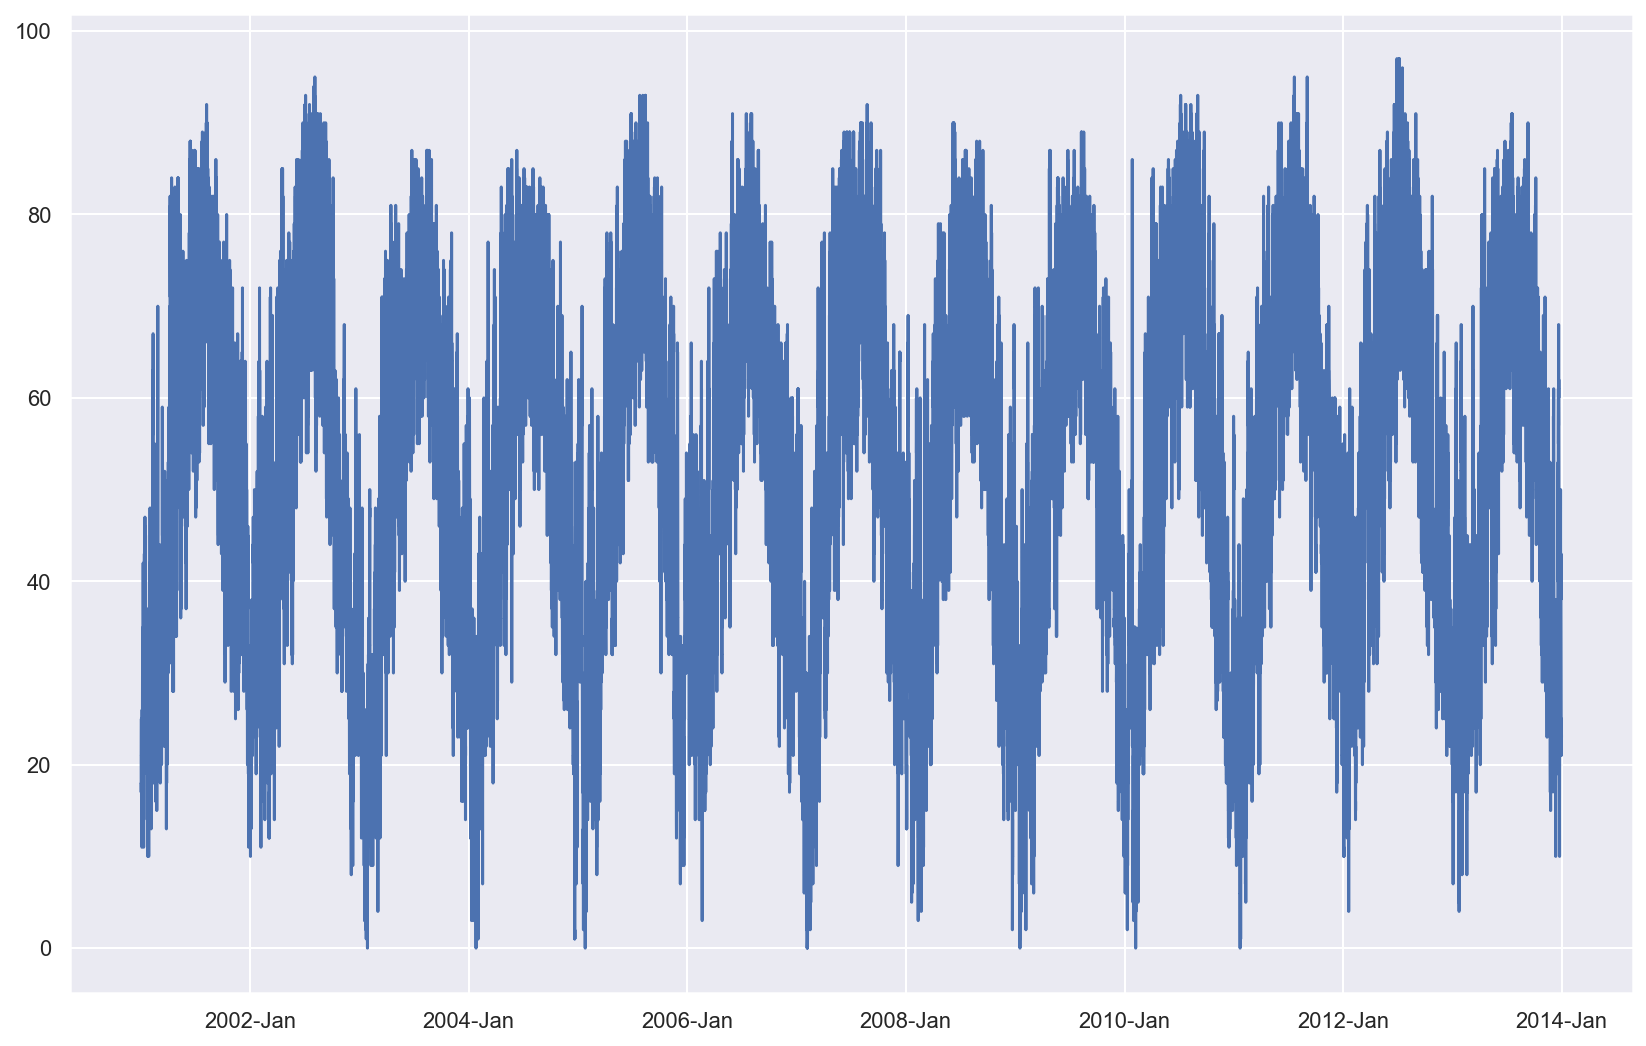

In [37]:
import datetime
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(14,9))
ax.plot(weather['Date'],weather['Temp'])
#ax.set_xlim(datetime.date(2006,1,1),datetime.date(2006,2,1))
years_fmt=mdates.DateFormatter('%Y-%b')
ax.xaxis.set_major_formatter(years_fmt)

In [38]:
annual_weather=weather[['Year','Temp','Rain']].groupby('Year').mean().reset_index()
monthly_weather=weather[['Month','Temp','Rain']].groupby('Month').mean().reset_index()

### Nested figures

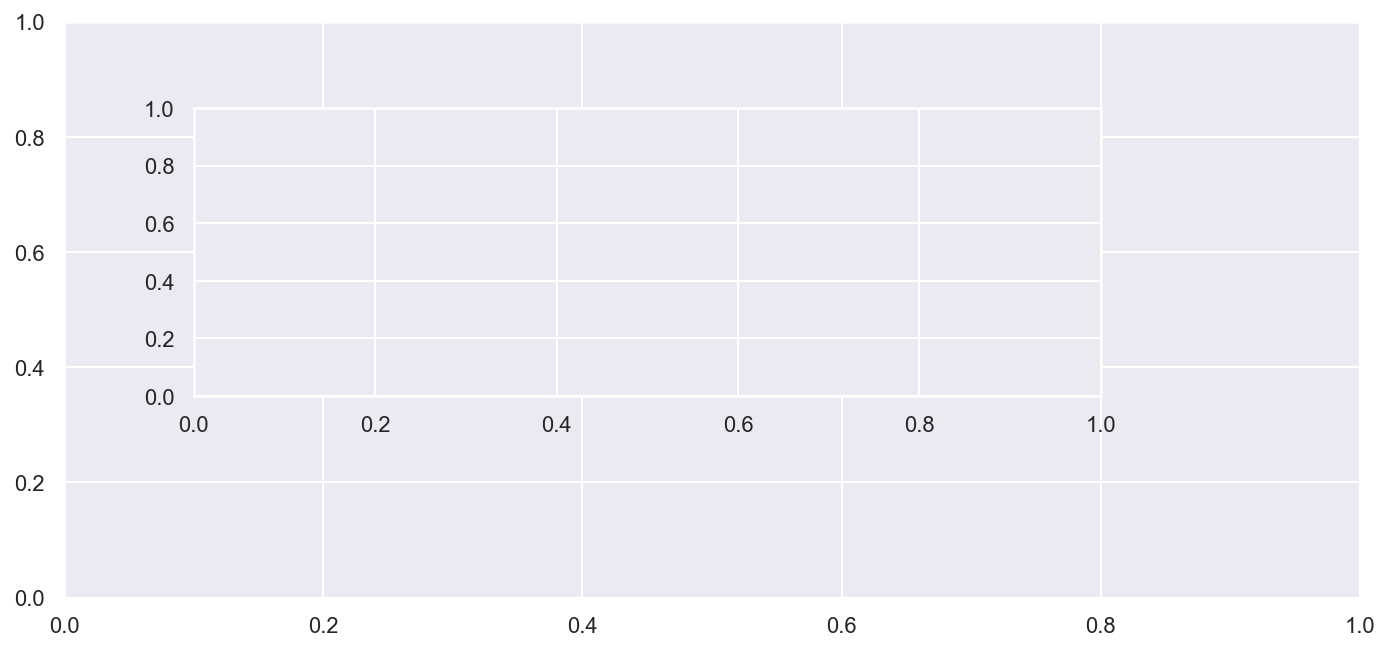

In [32]:
fig=plt.figure(figsize=(9,4))

ax1=fig.add_axes([0,0,1,1])
ax2=fig.add_axes([0.1,0.35,0.7,0.5])

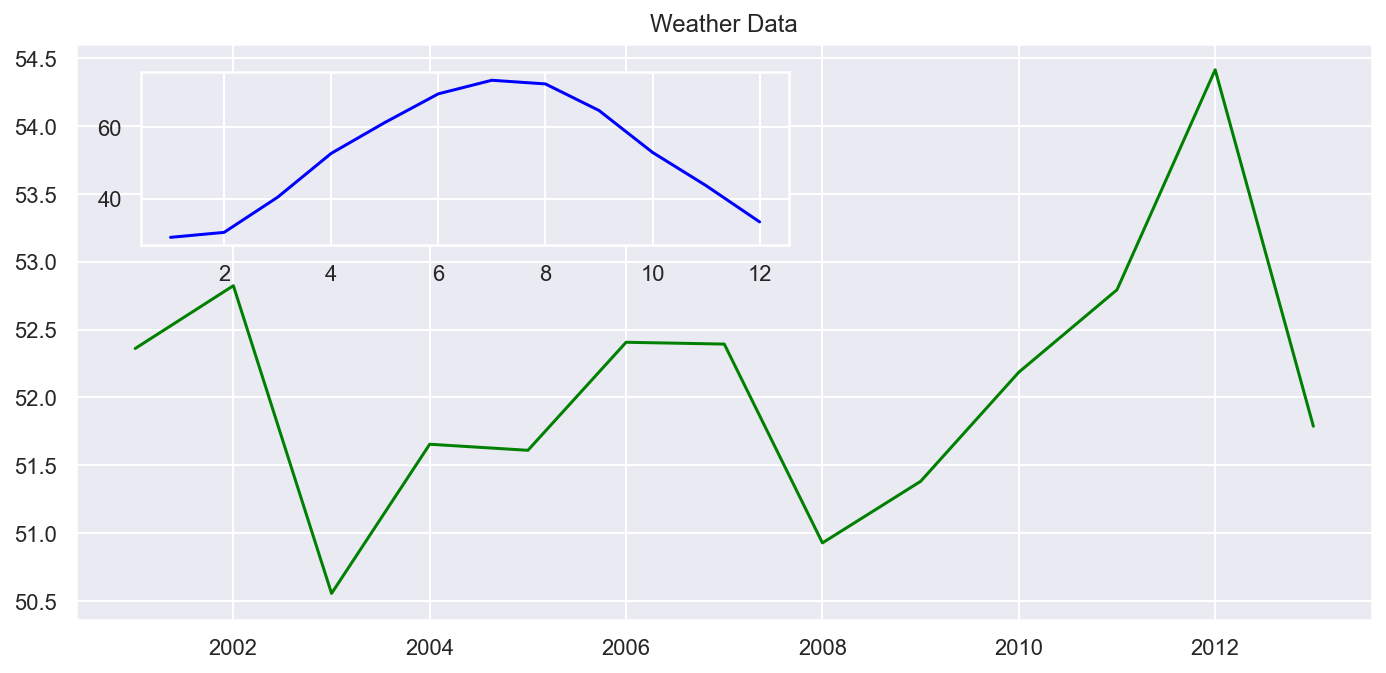

In [39]:
fig=plt.figure(figsize=(9,4))

ax1=fig.add_axes([0,0,1,1])
ax2=fig.add_axes([0.05,0.65,0.5,0.3]) #left, bottom, width, height

ax1.set_title('Weather Data')
ax1.plot(annual_weather['Year'],annual_weather['Temp'],color='green')

ax2.plot(monthly_weather['Month'],monthly_weather['Temp'],color='blue')

### Primary vs Secondary axis

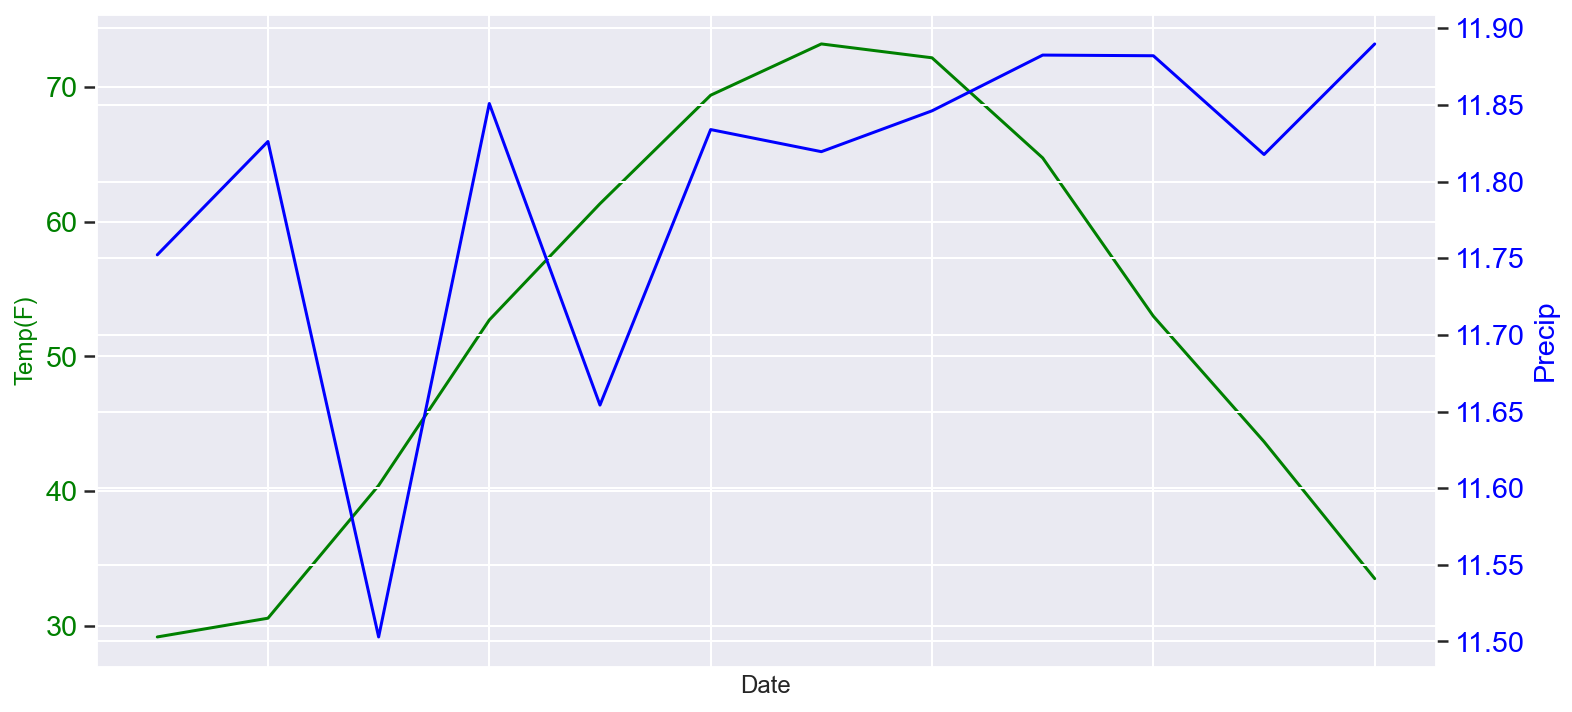

In [40]:
fig,ax=plt.subplots()

fig.set_figwidth(12)
fig.set_figheight(6)

ax.set_xlabel('Date')
ax.tick_params(axis='x',bottom=False,labelbottom=False)

ax.set_ylabel('Temp(F)',color='green')
ax.tick_params(axis='y',labelcolor='green',labelsize='large')

ax.plot(monthly_weather['Month'],
        monthly_weather['Temp'],
       color='green')

ax_twin=ax.twinx()
ax_twin.set_ylabel('Precip',color='blue',size='large')
ax_twin.tick_params(axis='y',labelcolor='blue',labelsize='large')

ax_twin.plot(monthly_weather['Month'],
        monthly_weather['Rain'],
       color='blue')


### For the lovers of ggplot

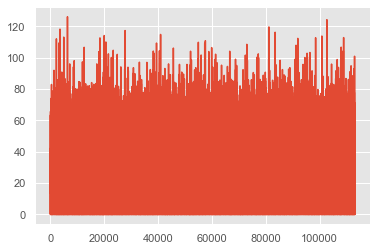

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')

# More on color below, but you can also set a color palette at the top
# Or set the plt style using the seaborn styles in matplotlib

# sns.set_palette('colorblind')
# plt.style.use('seaborn-colorblind')

plt.plot('Rain',data=weather)

### An Intresting read on <a href="https://medium.com/python-in-plain-english/radar-chart-basics-with-pythons-matplotlib-ba9e002ddbcd" target="_top">Radar chart / Ploar Area Chart </a>

A radar chart is a graphical method of displaying multivariate data in the form of a two-dimensional chart of three or more quantitative variables represented on axes starting from the same point.

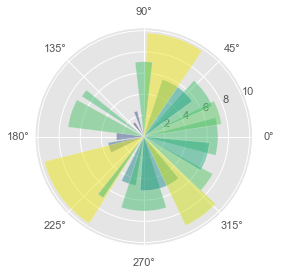

In [42]:
np.random.seed(19680801)

# Compute pie slices
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()

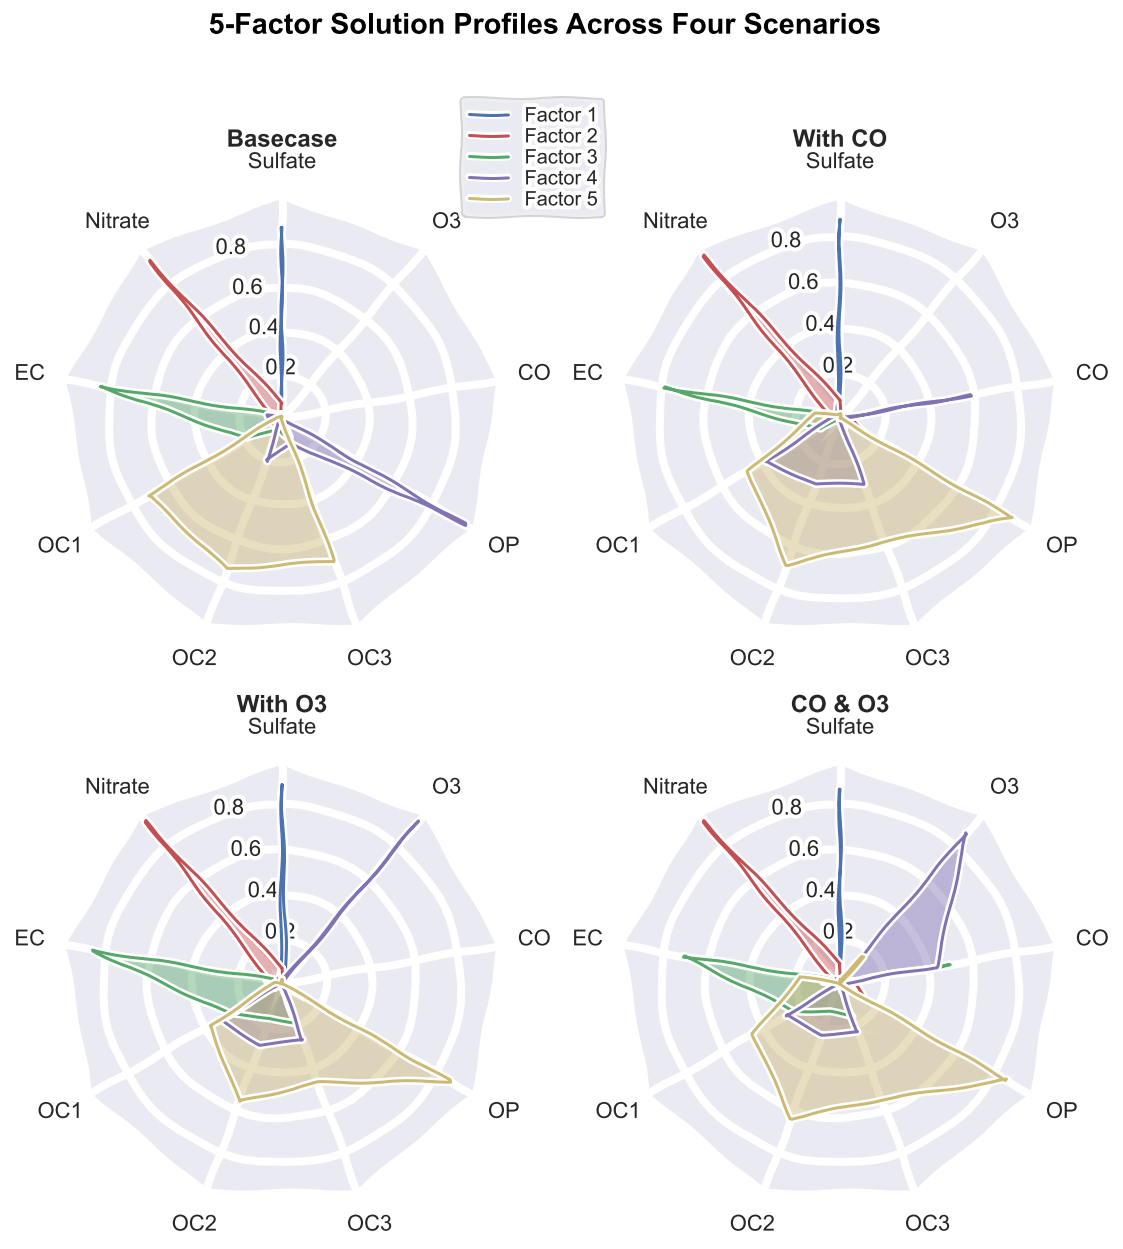

In [49]:

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


def example_data():
    # The following data is from the Denver Aerosol Sources and Health study.
    # See doi:10.1016/j.atmosenv.2008.12.017
    #
    # The data are pollution source profile estimates for five modeled
    # pollution sources (e.g., cars, wood-burning, etc) that emit 7-9 chemical
    # species. The radar charts are experimented with here to see if we can
    # nicely visualize how the modeled source profiles change across four
    # scenarios:
    #  1) No gas-phase species present, just seven particulate counts on
    #     Sulfate
    #     Nitrate
    #     Elemental Carbon (EC)
    #     Organic Carbon fraction 1 (OC)
    #     Organic Carbon fraction 2 (OC2)
    #     Organic Carbon fraction 3 (OC3)
    #     Pyrolized Organic Carbon (OP)
    #  2)Inclusion of gas-phase specie carbon monoxide (CO)
    #  3)Inclusion of gas-phase specie ozone (O3).
    #  4)Inclusion of both gas-phase species is present...
    data = [
        ['Sulfate', 'Nitrate', 'EC', 'OC1', 'OC2', 'OC3', 'OP', 'CO', 'O3'],
        ('Basecase', [
            [0.88, 0.01, 0.03, 0.03, 0.00, 0.06, 0.01, 0.00, 0.00],
            [0.07, 0.95, 0.04, 0.05, 0.00, 0.02, 0.01, 0.00, 0.00],
            [0.01, 0.02, 0.85, 0.19, 0.05, 0.10, 0.00, 0.00, 0.00],
            [0.02, 0.01, 0.07, 0.01, 0.21, 0.12, 0.98, 0.00, 0.00],
            [0.01, 0.01, 0.02, 0.71, 0.74, 0.70, 0.00, 0.00, 0.00]]),
        ('With CO', [
            [0.88, 0.02, 0.02, 0.02, 0.00, 0.05, 0.00, 0.05, 0.00],
            [0.08, 0.94, 0.04, 0.02, 0.00, 0.01, 0.12, 0.04, 0.00],
            [0.01, 0.01, 0.79, 0.10, 0.00, 0.05, 0.00, 0.31, 0.00],
            [0.00, 0.02, 0.03, 0.38, 0.31, 0.31, 0.00, 0.59, 0.00],
            [0.02, 0.02, 0.11, 0.47, 0.69, 0.58, 0.88, 0.00, 0.00]]),
        ('With O3', [
            [0.89, 0.01, 0.07, 0.00, 0.00, 0.05, 0.00, 0.00, 0.03],
            [0.07, 0.95, 0.05, 0.04, 0.00, 0.02, 0.12, 0.00, 0.00],
            [0.01, 0.02, 0.86, 0.27, 0.16, 0.19, 0.00, 0.00, 0.00],
            [0.01, 0.03, 0.00, 0.32, 0.29, 0.27, 0.00, 0.00, 0.95],
            [0.02, 0.00, 0.03, 0.37, 0.56, 0.47, 0.87, 0.00, 0.00]]),
        ('CO & O3', [
            [0.87, 0.01, 0.08, 0.00, 0.00, 0.04, 0.00, 0.00, 0.01],
            [0.09, 0.95, 0.02, 0.03, 0.00, 0.01, 0.13, 0.06, 0.00],
            [0.01, 0.02, 0.71, 0.24, 0.13, 0.16, 0.00, 0.50, 0.00],
            [0.01, 0.03, 0.00, 0.28, 0.24, 0.23, 0.00, 0.44, 0.88],
            [0.02, 0.00, 0.18, 0.45, 0.64, 0.55, 0.86, 0.00, 0.16]])
    ]
    return data


if __name__ == '__main__':
    N = 9
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    fig, axes = plt.subplots(figsize=(9, 9), nrows=2, ncols=2,
                             subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['b', 'r', 'g', 'm', 'y']
    # Plot the four cases from the example data on separate axes
    for ax, (title, case_data) in zip(axes.flat, data):
        ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
        ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
        for d, color in zip(case_data, colors):
            ax.plot(theta, d, color=color)
            ax.fill(theta, d, facecolor=color, alpha=0.25)
        ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    ax = axes[0, 0]
    labels = ('Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5')
    legend = ax.legend(labels, loc=(0.9, .95),
                       labelspacing=0.1, fontsize='small')

    fig.text(0.5, 0.965, '5-Factor Solution Profiles Across Four Scenarios',
             horizontalalignment='center', color='black', weight='bold',
             size='large')

    plt.show()

### Import and manage financial data in Python

In [44]:
import yfinance as yf

df=yf.download('AAPL','2019-01-01','2019-01-31')
df.head(20)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.439735,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.610851,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,36.088364,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,36.008041,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.694466,164101200
2019-01-09,37.822498,38.632500,37.407501,38.327499,37.317600,180396400
2019-01-10,38.125000,38.492500,37.715000,38.450001,37.436874,143122800
2019-01-11,38.220001,38.424999,37.877499,38.072498,37.069317,108092800
2019-01-14,37.712502,37.817501,37.305000,37.500000,36.511906,129756800


#### Animation vibe!

In [50]:
#activate
plt.xkcd() #animation stuff!

#deactivate
plt.rcdefaults() #end it!

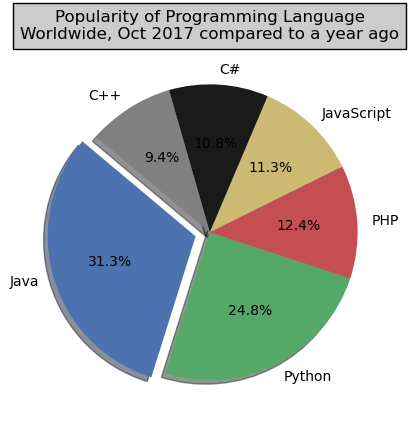

In [51]:
#plt.figure(figsize=(8,8))

# Plot data
languages = 'Java', 'Python', 'PHP', 'JavaScript', 'C#', 'C++'
popularity = [22.2, 17.6, 8.8, 8, 7.7, 6.7]
colors = ["b", "g", "r", "y", "k", "grey"]
explode = (0.1, 0, 0, 0, 0, 0)  

plt.pie(popularity, explode=explode, labels=languages, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Popularity of Programming Language\n" + "Worldwide, Oct 2017 compared to a year ago", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

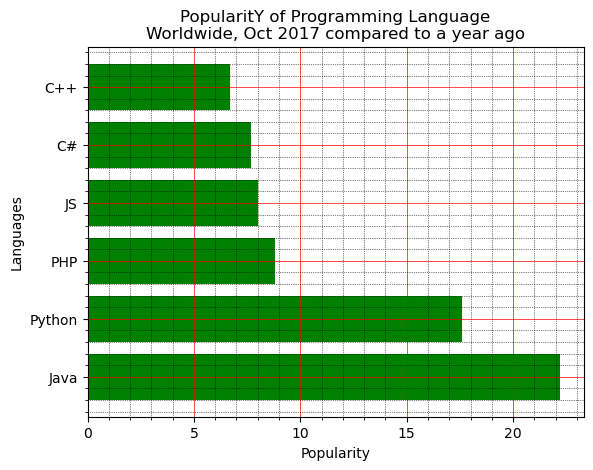

In [52]:
x = ['Java', 'Python', 'PHP', 'JS', 'C#', 'C++']
popularity = [22.2, 17.6, 8.8, 8, 7.7, 6.7]
x_pos = [i for i, _ in enumerate(x)]
plt.barh(x_pos, popularity, color='green')
plt.xlabel("Popularity")
plt.ylabel("Languages")
plt.title("PopularitY of Programming Language\n" + "Worldwide, Oct 2017 compared to a year ago")
plt.yticks(x_pos, x)
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [48]:
from IPython.core.display import display, HTML
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()
matplotlib.rcParams['figure.dpi'] = 144
import matplotlib.pyplot as plt

# Classwork Excercise

In [ ]:
rain_central_park_df = pd.read_csv("../Sample Data/Rain-Central Park.csv")

rain_central_park_df['DATE'] = pd.to_datetime(rain_central_park_df['DATE'])
rain_central_park_df['Weekday'] = rain_central_park_df['DATE'].dt.weekday
rain_central_park_df['Month'] = rain_central_park_df['DATE'].dt.month

display(HTML("<h3> City Stats </h3>"))
display(rain_central_park_df.head())

display(HTML("<h3> Station Stats </h3>"))
display(rain_central_park_df["STATION"].describe())

display(HTML("<h3> City Stats </h3>"))
display(rain_central_park_df["NAME"].describe())

# Playing Soccer in the weekend... Why Only Weekend is Rainy?

# Which month has more contribution to the total annual rainfall?

# Distribution of non-zero rainfall?